### Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, matthews_corrcoef

# Set the style for seaborn plots
sns.set_theme(style="whitegrid")

# Set pandas options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Warning messages
import warnings

warnings.filterwarnings('ignore')

# Import custom functions
import sys
import os

sys.path.append(os.path.abspath('../'))

### Read Data

In [2]:
df_raw = pd.read_csv('train.csv')

In [3]:
df_raw.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [5]:
df_raw.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
# Display the entire DataFrame
display(df_raw.describe(include='all'))

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,20758.00000,20758,20758.000000,20758.000000,20758.000000,20758,20758,20758.000000,20758.000000,20758,20758,20758.000000,20758,20758.000000,20758.000000,20758,20758,20758
unique,NaN,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,3,5,7
top,NaN,Female,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_III
freq,NaN,10422,NaN,NaN,NaN,17014,18982,NaN,NaN,17529,20513,NaN,20071,NaN,NaN,15066,16687,4046
mean,10378.50000,NaN,23.841804,1.700245,87.887768,NaN,NaN,2.445908,2.761332,NaN,NaN,2.029418,NaN,0.981747,0.616756,NaN,NaN,NaN
std,5992.46278,NaN,5.688072,0.087312,26.379443,NaN,NaN,0.533218,0.705375,NaN,NaN,0.608467,NaN,0.838302,0.602113,NaN,NaN,NaN
min,0.00000,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,5189.25000,NaN,20.000000,1.631856,66.000000,NaN,NaN,2.000000,3.000000,NaN,NaN,1.792022,NaN,0.008013,0.000000,NaN,NaN,NaN
50%,10378.50000,NaN,22.815416,1.700000,84.064875,NaN,NaN,2.393837,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.573887,NaN,NaN,NaN
75%,15567.75000,NaN,26.000000,1.762887,111.600553,NaN,NaN,3.000000,3.000000,NaN,NaN,2.549617,NaN,1.587406,1.000000,NaN,NaN,NaN


In [7]:
df_raw.sort_values(by='NObeyesdad', ascending=True).head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
8109,8109,Female,16.913841,1.704193,50.173425,no,yes,2.000000,3.558637,Sometimes,no,1.000000,no,0.955317,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
1840,1840,Male,22.814657,1.769269,51.132809,yes,yes,2.000000,3.000000,Sometimes,no,1.274774,no,0.112454,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
4278,4278,Male,17.767432,1.841908,60.000000,yes,yes,2.000000,4.000000,Sometimes,no,2.000000,no,2.000000,1.000000,no,Automobile,Insufficient_Weight
14098,14098,Male,18.000000,1.755926,52.331172,no,yes,1.362441,3.000000,Sometimes,no,2.000000,no,0.021120,1.285838,Sometimes,Public_Transportation,Insufficient_Weight
9115,9115,Male,17.210933,1.819557,58.325122,yes,yes,2.559600,4.000000,Sometimes,no,2.000000,no,2.000000,0.000000,Sometimes,Automobile,Insufficient_Weight


### Exploratory Data Analysis 

In [8]:
# Copy the dataframe
df = df_raw.copy()

# Drop the columns that are not needed
df = df.drop(['id'], axis=1)


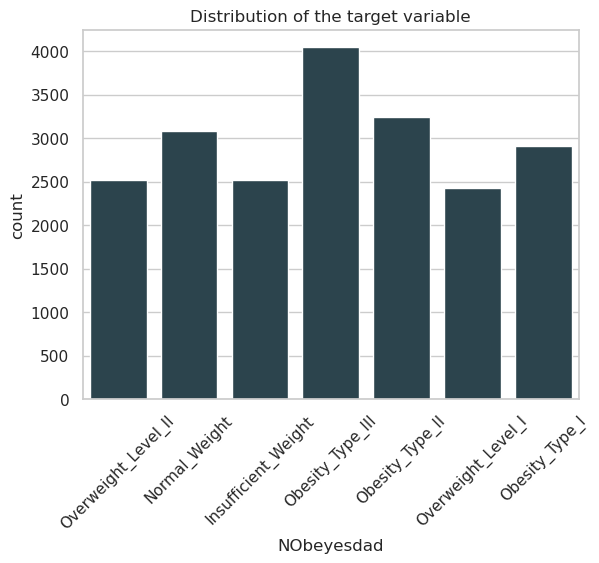

In [9]:
# Distribution of the target variable

sns.countplot(x='NObeyesdad', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of the target variable')
plt.show()

In [10]:
# Copy the dataframe
df_eda = df.copy()

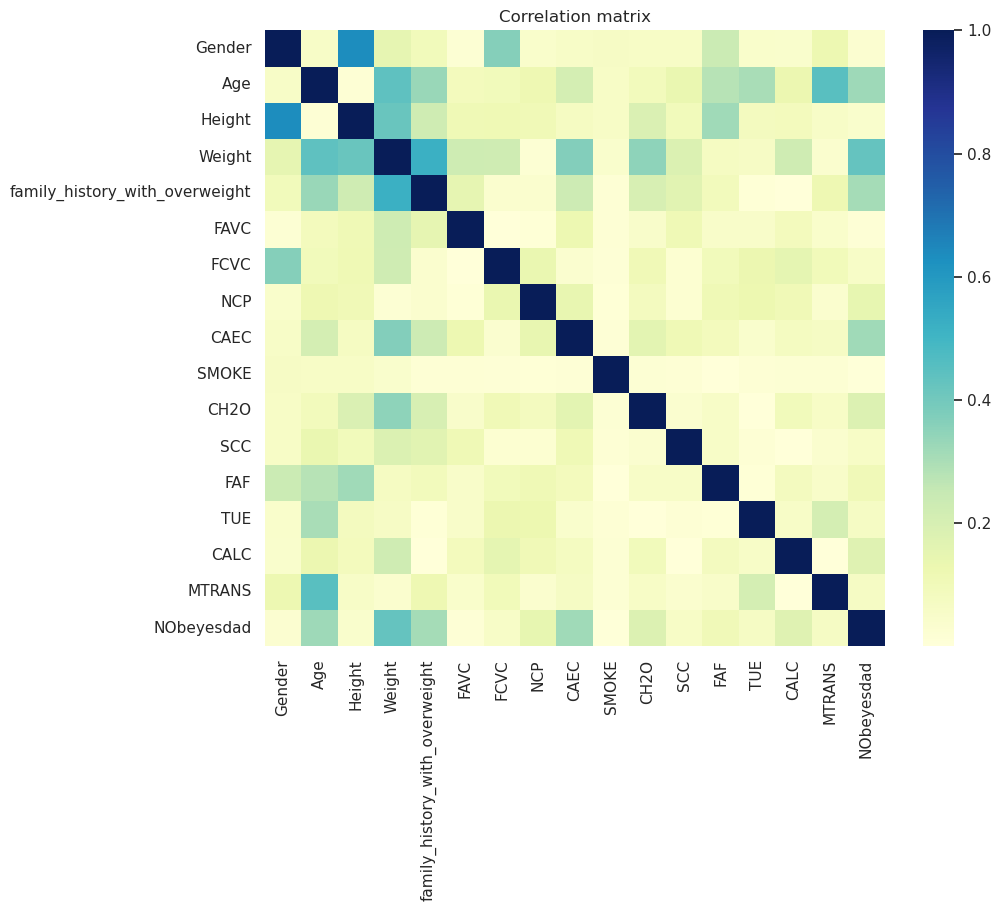

In [11]:
from sklearn.preprocessing import LabelEncoder

# Identify the categorical columns
categorical_columns = df_eda.select_dtypes(include=['object']).columns

# Transform categorical variables 
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_eda[column] = label_encoder.fit_transform(df_eda[column].astype(str))

# Correlation matrix
corr = df_eda.corr('spearman').abs()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation matrix')
plt.show()

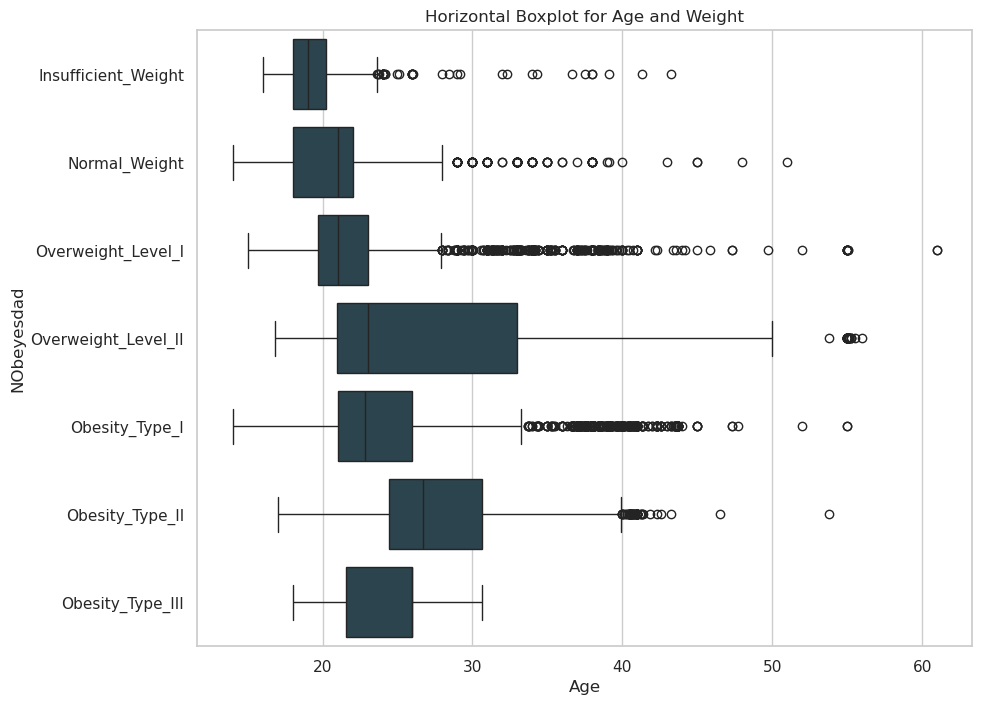

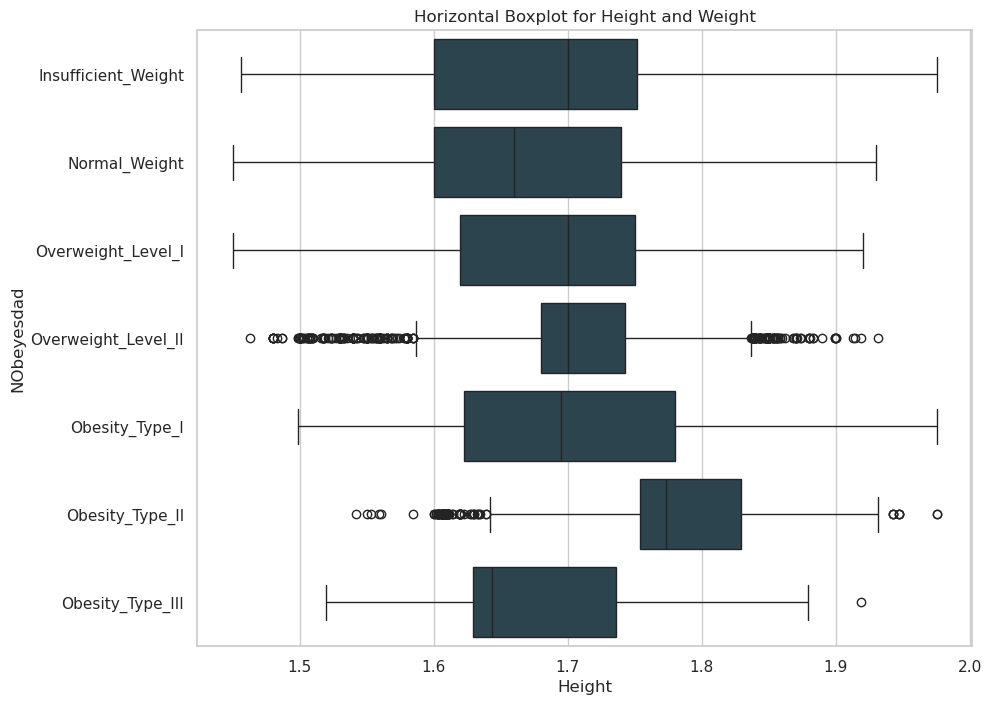

In [12]:
# Ensure the order list matches the unique values in the 'NObeyesdad' column
nobeyesdad_order = [
    'Insufficient_Weight', 
    'Normal_Weight', 
    'Overweight_Level_I', 
    'Overweight_Level_II', 
    'Obesity_Type_I', 
    'Obesity_Type_II', 
    'Obesity_Type_III'
]

# Ensure the order list matches the unique values in the 'CAEC' column
caec_order = ['Always', 'Frequently', 'Sometimes', 'no']

# Horizontal boxplot for Age and Weight
plt.figure(figsize=(10, 8))
sns.boxplot(x='Age', y='NObeyesdad', data=df, orient='h', order=nobeyesdad_order)
plt.title('Horizontal Boxplot for Age and Weight')
plt.xlabel('Age')
plt.ylabel('NObeyesdad')
plt.show()

# Horizontal boxplot for Height and Weight
plt.figure(figsize=(10, 8))
sns.boxplot(x='Height', y='NObeyesdad', data=df, orient='h', order=nobeyesdad_order)
plt.title('Horizontal Boxplot for Height and Weight')
plt.xlabel('Height')
plt.ylabel('NObeyesdad')
plt.show()



### Preprocessing

In [13]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [14]:
categorical_columns = X.select_dtypes(include=['object']).columns
categorical_columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

In [15]:
print(df['CAEC'].unique())
print(df['CALC'].unique())

['Sometimes' 'Frequently' 'no' 'Always']
['Sometimes' 'no' 'Frequently']


In [16]:
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS']
ordinal_features = ['CAEC', 'CALC']

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler, LabelBinarizer
import pandas as pd
from scripts.skewness_fixer import SkewnessFixer


# Define preprocessing for numerical features (Imputation only + Skewness Fixer)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('skewness_fixer', SkewnessFixer(skewness_threshold=0.5, boxcox_lambda=0.15))
])

# Define preprocessing for categorical features (Imputation + OneHotEncoder)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the ordinal transformer using the categories from categories_dict
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('ordinal', OrdinalEncoder(categories=[['no', 'Sometimes', 'Frequently', 'Always'], ['no', 'Sometimes', 'Frequently']]))
])

# Combine preprocessing steps for each type of feature (without scaling)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ]
)

# Fit and transform the training data without scaling
X_train_noscaled = preprocessor.fit_transform(X_train)
X_test_noscaled = preprocessor.transform(X_test)

# Define the full pipeline with scaling applied after encoding
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),   # Apply all feature transformations
    ('scaler', RobustScaler())        # Apply scaling after encoding
])

# Fit and transform the training data
X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

# Extract categorical feature names from the OneHotEncoder
cat_feature_names = pipeline.named_steps['preprocessor']\
                            .named_transformers_['cat']\
                            .named_steps['onehot']\
                            .get_feature_names_out(categorical_features)

# Manually concatenate feature names for all parts (numerical, categorical, ordinal)
feature_names = list(numerical_features) + list(cat_feature_names) + list(ordinal_features)

# Convert the scaled data into a DataFrame 
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test.index, columns=feature_names)

# Convert the noscaled data into a DataFrame
X_train_noscaled_df = pd.DataFrame(X_train_noscaled, index=X_train.index, columns=feature_names)
X_test_noscaled_df = pd.DataFrame(X_test_noscaled, index=X_test.index, columns=feature_names)

# Scaled the target variable
label_scaler = LabelEncoder()
y_train_scaled = label_scaler.fit_transform(y_train.values.ravel())
y_test_scaled = label_scaler.transform(y_test.values.ravel())

# Verify the shapes
print(X_train_scaled_df.shape)
print(X_test_scaled_df.shape)
print(y_train_scaled.shape)
print(y_test_scaled.shape)

(14530, 25)
(6228, 25)
(14530,)
(6228,)


### Models

In [18]:
from sklearn.model_selection import StratifiedKFold
from scripts.ml_class import ml_class_im
from scripts.eval_class import evaluate_models

# Define random state
rs = 42

# Use Stratified KFold for preserving the class distribution in cross-validation
cv = StratifiedKFold(n_splits=5)

# Initialize the models
models = ml_class_im(cv, rs)

# Evaluate the models
parameters, markdown_content = evaluate_models(models, X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled)

# Display the results
display(Markdown(markdown_content))

Evaluating models:   0%|          | 0/8 [00:00<?, ?it/s]

/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

### Model Evaluation

| <center> Model                </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:---------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Logistic Regression  |         0.855884 |        0.859184 |          0.858075 |         0.860502 |       0.855884 |      0.859184 |   0.85594  |  0.859091 |    0.83115  |   0.834949 |
| KNN                  |         1        |        0.796564 |          1        |         0.793391 |       1        |      0.796564 |   1        |  0.793619 |    1        |   0.761557 |
| Gaussian Naive Bayes |         0.583345 |        0.584136 |          0.605047 |         0.605299 |       0.583345 |      0.584136 |   0.548752 |  0.550439 |    0.523439 |   0.524118 |
| Decision Tree        |         0.553063 |        0.554913 |          0.514608 |         0.512953 |       0.553063 |      0.554913 |   0.509171 |  0.510629 |    0.49073  |   0.492989 |
| Random Forest        |         0.727392 |        0.727842 |          0.674509 |         0.675098 |       0.727392 |      0.727842 |   0.687473 |  0.68811  |    0.693928 |   0.69451  |
| Extra Trees          |         0.658913 |        0.658478 |          0.624414 |         0.619066 |       0.658913 |      0.658478 |   0.602689 |  0.600053 |    0.615235 |   0.614681 |
| AdaBoost             |         0.500413 |        0.500482 |          0.417916 |         0.423553 |       0.500413 |      0.500482 |   0.38593  |  0.383941 |    0.432893 |   0.433503 |
| Neural Networks      |         0.886442 |        0.883911 |          0.88569  |         0.882762 |       0.886442 |      0.883911 |   0.885812 |  0.88313  |    0.866861 |   0.863877 |



### Feature Selection

In [19]:
# Fit the Random Forest model
rf_model = parameters['Random Forest']

rf_model.fit(X_train_scaled, y_train_scaled)

# Get feature importances from the model
importances = rf_model.feature_importances_

# Create a DataFrame to rank features by importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train_noscaled_df.columns,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top features that cumulatively explain 95% of the importance
cumulative_importance = 0.95
top_features_rf = feature_importance_df['Feature'].values[feature_importance_df['Importance'].cumsum() < cumulative_importance]

# Display the top features
print("Top features using Random Forest:", top_features_rf)

Top features using Random Forest: ['Weight' 'FCVC' 'Gender_Female' 'Gender_Male' 'Age' 'Height' 'TUE' 'CH2O'
 'family_history_with_overweight_yes' 'family_history_with_overweight_no'
 'FAF']


In [20]:
# Filter the top features from the training and test sets for scaled data
X_train_top_rf = X_train_scaled_df[top_features_rf]
X_test_top_rf = X_test_scaled_df[top_features_rf]

# Evaluate the models with the top features
_ , markdown_top_content = evaluate_models(models, X_train_top_rf, X_test_top_rf, y_train_scaled, y_test_scaled)

# Display the results
display(Markdown(markdown_top_content))

Evaluating models:   0%|          | 0/8 [00:00<?, ?it/s]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The m

### Model Evaluation

| <center> Model                </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:---------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Logistic Regression  |         0.84618  |        0.84955  |          0.848808 |         0.85134  |       0.84618  |      0.84955  |   0.846413 |  0.849675 |    0.819785 |   0.82366  |
| KNN                  |         0.996696 |        0.798972 |          0.996704 |         0.796332 |       0.996696 |      0.798972 |   0.996695 |  0.7959   |    0.996127 |   0.764564 |
| Gaussian Naive Bayes |         0.588782 |        0.592967 |          0.556475 |         0.56284  |       0.588782 |      0.592967 |   0.54335  |  0.548301 |    0.522489 |   0.527883 |
| Decision Tree        |         0.61755  |        0.621869 |          0.539996 |         0.542526 |       0.61755  |      0.621869 |   0.559327 |  0.563541 |    0.57914  |   0.583409 |
| Random Forest        |         0.753338 |        0.754496 |          0.701019 |         0.702065 |       0.753338 |      0.754496 |   0.713922 |  0.714891 |    0.725238 |   0.726687 |
| Extra Trees          |         0.715623 |        0.713552 |          0.673615 |         0.670011 |       0.715623 |      0.713552 |   0.671191 |  0.667981 |    0.683863 |   0.681422 |
| AdaBoost             |         0.500413 |        0.500482 |          0.417916 |         0.423553 |       0.500413 |      0.500482 |   0.38593  |  0.383941 |    0.432893 |   0.433503 |
| Neural Networks      |         0.892498 |        0.867213 |          0.892645 |         0.866367 |       0.892498 |      0.867213 |   0.892321 |  0.866551 |    0.873993 |   0.844319 |



In [21]:
from sklearn.feature_selection import RFECV

# Initialize the RFECV model
rfecv = RFECV(rf_model, cv=cv)  # Cross-validation to find the optimal number of features

# Fit RFE
rfecv.fit(X_train_scaled, y_train_scaled)

# Number of features
top_features_rfecv = X_train_scaled_df.columns[rfecv.support_]
print("Top features using RFECV:", top_features_rfecv)


Top features using RFECV: Index(['Age', 'Height', 'Weight', 'FCVC', 'CH2O', 'TUE', 'Gender_Female',
       'Gender_Male', 'family_history_with_overweight_yes'],
      dtype='object')


In [22]:
# Filter the top features from the training and test sets
X_train_top_rfecv = X_train_scaled_df.loc[:, top_features_rfecv]
X_test_top_rfecv = X_test_scaled_df.loc[:, top_features_rfecv]

# Evaluate the models with the top features
_ , markdown_top_rfecv_content = evaluate_models(models, X_train_top_rfecv, X_test_top_rfecv, y_train_scaled, y_test_scaled)

Evaluating models:   0%|          | 0/8 [00:00<?, ?it/s]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The m

### Variance Inflation Factir (VIF) to adress Multicollinearity 

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

# Calculate VIF for the predictors
vif_data = calculate_vif(X_train_scaled_df)

# Print VIF values
print("VIF Values:\n", vif_data)

# Remove predictors with high VIF values (e.g., VIF > 10)
high_vif_features = vif_data[vif_data["VIF"] > 10]["feature"]

# Remove the features with high VIF values from scale data
xtrain_reduced = X_train_scaled_df.drop(columns=high_vif_features)
xtest_reduced = X_test_scaled_df.drop(columns=high_vif_features)

# Evaluate the models with the reduced features
_ , markdown_top_content = evaluate_models(models, xtrain_reduced, xtest_reduced, y_train_scaled, y_test_scaled)

# Print the shape of the reduced data
print("Shape of the train reduced data:", xtrain_reduced.shape)
print("Shape of the test reduced data:", xtest_reduced.shape)

# Display the results
display(Markdown(markdown_top_content))


VIF Values:
                                feature       VIF
0                                  Age  2.118428
1                               Height  2.136805
2                               Weight  2.101511
3                                 FCVC  1.244223
4                                  NCP  1.208551
5                                 CH2O  1.150332
6                                  FAF  1.276355
7                                  TUE  1.185814
8                        Gender_Female       inf
9                          Gender_Male       inf
10   family_history_with_overweight_no       inf
11  family_history_with_overweight_yes       inf
12                             FAVC_no       inf
13                            FAVC_yes       inf
14                            SMOKE_no       inf
15                           SMOKE_yes       inf
16                              SCC_no       inf
17                             SCC_yes       inf
18                   MTRANS_Automobile       inf
19     

Evaluating models:   0%|          | 0/8 [00:00<?, ?it/s]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The m

Shape of the train reduced data: (14530, 10)
Shape of the test reduced data: (6228, 10)


### Model Evaluation

| <center> Model                </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:---------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Logistic Regression  |         0.838541 |        0.842325 |          0.8421   |         0.844514 |       0.838541 |      0.842325 |   0.839158 |  0.842417 |    0.810847 |   0.815215 |
| KNN                  |         0.998692 |        0.799454 |          0.998693 |         0.796717 |       0.998692 |      0.799454 |   0.998692 |  0.796694 |    0.998467 |   0.76499  |
| Gaussian Naive Bayes |         0.692154 |        0.691554 |          0.681456 |         0.680478 |       0.692154 |      0.691554 |   0.681935 |  0.680606 |    0.639428 |   0.63895  |
| Decision Tree        |         0.651617 |        0.631503 |          0.714849 |         0.691321 |       0.651617 |      0.631503 |   0.634174 |  0.610995 |    0.599214 |   0.575664 |
| Random Forest        |         0.743703 |        0.74711  |          0.695549 |         0.699056 |       0.743703 |      0.74711  |   0.703113 |  0.705883 |    0.714413 |   0.718603 |
| Extra Trees          |         0.664625 |        0.667791 |          0.630694 |         0.63334  |       0.664625 |      0.667791 |   0.612133 |  0.614971 |    0.625093 |   0.628643 |
| AdaBoost             |         0.500413 |        0.500482 |          0.417916 |         0.423553 |       0.500413 |      0.500482 |   0.38593  |  0.383941 |    0.432893 |   0.433503 |
| Neural Networks      |         0.885891 |        0.869621 |          0.885335 |         0.868035 |       0.885891 |      0.869621 |   0.88554  |  0.86858  |    0.866168 |   0.847107 |



### Model training with Polynomial Features

In [24]:
# Polynomial features

from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

# Fit and transform the training scaled data
X_train_poly = polynomial.fit_transform(X_train_scaled_df)
X_test_poly = polynomial.transform(X_test_scaled_df)

# Evaluate the models with polynomial features
_ , markdown_poly_content = evaluate_models(models, X_train_poly, X_test_poly, y_train_scaled, y_test_scaled)

# Display the results
display(Markdown(markdown_poly_content))

Evaluating models:   0%|          | 0/8 [00:00<?, ?it/s]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The m

### Model Evaluation

| <center> Model                </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:---------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Logistic Regression  |         0.84212  |        0.831246 |          0.858821 |         0.84605  |       0.84212  |      0.831246 |   0.839907 |  0.828919 |    0.817331 |   0.804338 |
| KNN                  |         1        |        0.79833  |          1        |         0.796618 |       1        |      0.79833  |   1        |  0.795707 |    1        |   0.763777 |
| Gaussian Naive Bayes |         0.526084 |        0.521516 |          0.55847  |         0.531123 |       0.526084 |      0.521516 |   0.467505 |  0.461087 |    0.46312  |   0.457109 |
| Decision Tree        |         0.564487 |        0.564547 |          0.53617  |         0.53667  |       0.564487 |      0.564547 |   0.525904 |  0.526106 |    0.502747 |   0.503158 |
| Random Forest        |         0.693049 |        0.692839 |          0.66353  |         0.66342  |       0.693049 |      0.692839 |   0.640303 |  0.640692 |    0.659045 |   0.658791 |
| Extra Trees          |         0.651686 |        0.659281 |          0.593712 |         0.603185 |       0.651686 |      0.659281 |   0.596216 |  0.6041   |    0.601592 |   0.61098  |
| AdaBoost             |         0.500413 |        0.500482 |          0.417916 |         0.423553 |       0.500413 |      0.500482 |   0.38593  |  0.383941 |    0.432893 |   0.433503 |
| Neural Networks      |         0.90351  |        0.873475 |          0.902662 |         0.871726 |       0.90351  |      0.873475 |   0.902971 |  0.872263 |    0.886856 |   0.851686 |



### Bagging

In [25]:
from sklearn.ensemble import BaggingClassifier

# Define the base model
base_model = parameters['Random Forest']

# Apply Bagging with 50 estimators (you can change n_estimators as needed)
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=50, random_state=rs, n_jobs=-1)

# Fit the bagging model to training data
bagging_model.fit(X_train_noscaled, y_train_scaled)

# Make predictions
y_pred_train = bagging_model.predict(X_train_scaled)
y_pred_test = bagging_model.predict(X_test_scaled)

# Evaluate the model 
_,_,f1_train,_ = precision_recall_fscore_support(y_train_scaled, y_pred_train, average='weighted')
_,_,f1_test,_ = precision_recall_fscore_support(y_test_scaled, y_pred_test, average='weighted')


# Display the evaluation metrics for the trained model and test data
print("Train F1 Score:", f1_train)
print("Test F1 Score:", f1_test)

Train F1 Score: 0.04026060187113486
Test F1 Score: 0.04160770683966553


### XGBOOST

In [26]:
from xgboost import XGBClassifier, callback
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid for XGBoost Classifier
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [2, 5, 7]
}

# Early stopping callback for XGBoost
es = callback.EarlyStopping(
    rounds=10,
    min_delta=1e-3,
    save_best=True,
    maximize=False,
    metric_name='mlogloss',
)

# Initialize XGBoost Regressor model
xgb_model = XGBClassifier(verbosity=0, random_state=42, callbacks=[es], eval_metric='mlogloss', objective='multi:softprob')

# Randomized search over the parameter grid
xgb_grid = RandomizedSearchCV(xgb_model, param_grid_xgb, cv=cv, n_jobs=-1, verbose=0)

# Fit the XGBoost model with early stopping
xgb_grid.fit(X_train_scaled, y_train_scaled, 
             eval_set=[(X_test_scaled, y_test_scaled)],
             verbose=False)

# Make predictions
y_pred = xgb_grid.predict(X_test_scaled)

# Evaluate the model 
_,_,f1_train,_ = precision_recall_fscore_support(y_train_scaled, xgb_grid.predict(X_train_scaled), average='weighted')
_,_,f1_test,_ = precision_recall_fscore_support(y_test_scaled, y_pred, average='weighted')


# Display the evaluation metrics for the trained model and test data
print("Train F1 Score:", f1_train)
print("Test F1 Score:", f1_test)


Train F1 Score: 0.9481946175454851
Test F1 Score: 0.9071891440996273


### Neural Network

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, Sequential, layers
from keras.optimizers import Adam
import keras_tuner as kt
from keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.regularizers import l2

tf.random.set_seed(42)

2024-10-17 21:13:10.703548: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-17 21:13:10.706811: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-17 21:13:10.713450: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-17 21:13:10.722521: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-17 21:13:10.725524: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-17 21:13:10.734669: I tensorflow/core/platform/cpu_feature_gu

In [28]:
y_train_onehot = keras.utils.to_categorical(y_train_scaled)
y_test_onehot = keras.utils.to_categorical(y_test_scaled)

In [29]:
# Configure the search space
hp = kt.engine.hyperparameters.HyperParameters()
# Tuning the number of layers
hp.Int('layers', min_value=1, max_value=5, step=1)
# Tuning the number of units per layer and the dropout rate
for i in range(5):
    hp.Int(f'units_{i}', min_value=8, max_value=128, step=8)
    hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)
#tuning the activation function
hp.Choice('activation', values=['relu', 'tanh', 'elu', 'selu'])
# Tuning the learning rate
hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])
#Tuning the bath size
hp.Choice('batch_size', values=[32, 64, 128, 256, 512, 1024])

def model_builder(hp):
    model = Sequential()

    # Hidden layers with different numbers of units per layer
    for i in range(hp.get('layers')):
        model.add(layers.Dense(units=hp.get(f'units_{i}'),
                               activation=hp.get('activation')
                               ))
        model.add(layers.Dropout(rate=hp.get(f'dropout_{i}')))
        
    # Output layer
    model.add(layers.Dense(7, activation='softmax'))
    
    # Compile the model
    model.compile(
        optimizer=Adam(hp.get('learning_rate'), beta_1=0.9, beta_2=0.999, epsilon=1e-07),
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )
    
    return model

In [30]:
## Define the tuner
tuner = kt.Hyperband(
    model_builder,
    objective=kt.Objective('val_accuracy', direction='max'),  # Specify the objective with direction
    max_epochs=30,
    factor=3,
    directory='my_dir',
    project_name='my_project',
    hyperparameters=hp,
    overwrite=True
)

# Define early stopping callback
callbacks = [EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True),
                TensorBoard(log_dir='logs')]

In [31]:
tuner.search(
    X_train_scaled,
    y_train_onehot,
    epochs=30,
    validation_data=(X_test_scaled, y_test_onehot),
    callbacks=callbacks,
    batch_size=hp.get('batch_size')
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:", best_hps.values)

Trial 90 Complete [00h 00m 17s]
val_accuracy: 0.8225754499435425

Best val_accuracy So Far: 0.8821451663970947
Total elapsed time: 00h 09m 05s
Best Hyperparameters: {'layers': 3, 'units_0': 96, 'dropout_0': 0.30000000000000004, 'units_1': 64, 'dropout_1': 0.30000000000000004, 'units_2': 120, 'dropout_2': 0.0, 'units_3': 112, 'dropout_3': 0.30000000000000004, 'units_4': 56, 'dropout_4': 0.4, 'activation': 'relu', 'learning_rate': 0.001, 'batch_size': 64, 'tuner/epochs': 30, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


In [32]:
# Build the model with the best hyperparameters
history = model_builder(best_hps)

# Train the model
history.fit(
    X_train_scaled, 
    y_train_onehot,
    epochs=10, 
    validation_data=(X_test_scaled, y_test_onehot),
    callbacks=callbacks,
    batch_size=best_hps.get('batch_size'),
)


Epoch 1/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4696 - loss: 1.3784 - val_accuracy: 0.7587 - val_loss: 0.5814
Epoch 2/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7245 - loss: 0.6654 - val_accuracy: 0.8213 - val_loss: 0.4649
Epoch 3/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7707 - loss: 0.5671 - val_accuracy: 0.8401 - val_loss: 0.4394
Epoch 4/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7939 - loss: 0.5278 - val_accuracy: 0.8443 - val_loss: 0.4206
Epoch 5/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8000 - loss: 0.5104 - val_accuracy: 0.8565 - val_loss: 0.4055
Epoch 6/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8147 - loss: 0.4835 - val_accuracy: 0.8618 - val_loss: 0.3949
Epoch 7/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8271 - loss: 0.4654 - val_accuracy: 0.8613 - val_loss: 0.3913
Epoch 8/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8310 - loss: 0.4592 - val_accuracy: 0.

In [33]:
# Predict the target values using the trained model
y_pred_train = history.predict(X_train_scaled)
y_pred_test = history.predict(X_test_scaled)


455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step


In [34]:
y_pred_train = np.argmax(y_pred_train, axis=1)
y_pred_test = np.argmax(y_pred_test, axis=1)

# Compute the F1 score for the training and test data
accuracy_train = accuracy_score(y_train_scaled, y_pred_train)
accuracy_test = accuracy_score(y_test_scaled, y_pred_test)
_,_,f1_train,_ = precision_recall_fscore_support(y_train_scaled, y_pred_train, average='weighted')
_,_,f1_test,_ = precision_recall_fscore_support(y_test_scaled, y_pred_test, average='weighted')   

# Display the evaluation metrics for the trained model and test data
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)
print("Train F1 Score:", f1_train)
print("Test F1 Score:", f1_test)

Train Accuracy: 0.8778389538885065
Test Accuracy: 0.8741168914579319
Train F1 Score: 0.8768209339999115
Test F1 Score: 0.8727778592742772


In [35]:
history.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 96)             │         2,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 120)            │         7,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │           847 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,055 (203.34 KB)

 Trainable params: 17,351 (67.78 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,704 (135.57 KB)

### Model Evaluation and Selection

Given the many categories with varying proportions, we focus on the **F1-score** for evaluation. According to this metric, the **Neural Network** performs best, achieving one of the highest scores on the test data. Its training score is also very close to the test score, indicating strong generalization. In contrast, other models show significantly higher training scores, suggesting overfitting and reduced reliability. However, some ensemble methods, like AdaBoost and Bagging, produce similarly strong results.